## Census Income Project

In [1]:
# importing project dependencies:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
# import the data with lower case x=column name
df = pd.read_csv('census_income.csv')

In [48]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())


Size of dataset 
  (32560, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Details dataset
 None 

Checking for NULL/Missing values 
 A

In [49]:
# description of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
# description of the dataset
df.describe(include=np.object)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [51]:
# There are some missing values in the datset which are represented by '?'
# Let's convert them to NaNs
df[df == ' ?'] = np.nan

In [52]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [53]:
df.isna().mean()

Age               0.000000
Workclass         0.056388
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.056603
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    0.017905
Income            0.000000
dtype: float64

Inference
* The dataset has 32,561 observations with 14 Features and 1 Target Class.
* Though the data didin't had any nan values but we saw values like '?' whcih we assumned to mising values.
* This missing values will be treated as nan values,the  missing data less is around 5.7% of the total vaules in the column


* Take a look at the target variable:
    * it has 2 classes:
    * 1: greater than 50K
    * 2: 50K or lower
    * We need to it convert it into machine learning compatible values



### EDA

### Univariate Analysis

In [54]:
#Age
df.Age.describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

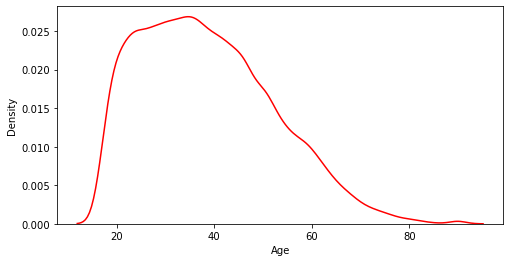

In [55]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df.Age,hist=False,color='red')
plt.show()

<AxesSubplot:title={'center':'Age with outliers'}>

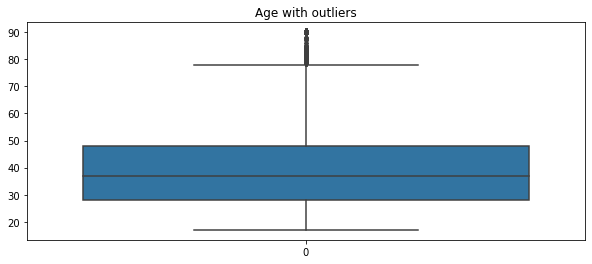

In [56]:
plt.figure(figsize=(10,4))
plt.title('Age with outliers')
sns.boxplot(data=df.Age,orient='v')


In [57]:
# from the box plot we can interpret that the outliers may be present about 0.99 quantile.
# Let's remove those observations whose lies above 99% of all the ages.
q = df.Age.quantile(0.99)

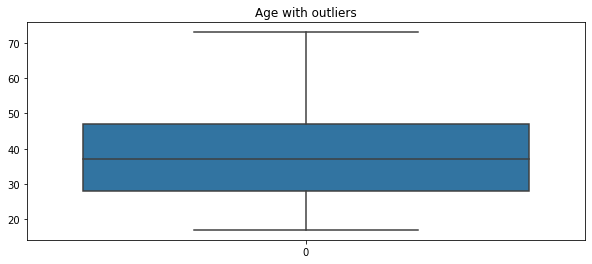

In [25]:
plt.figure(figsize=(10,4))
plt.title('Age with outliers')
sns.boxplot(data=df[df.age<q]['age'],orient='v')
plt.show()

In [58]:
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned.Age<q]

In [67]:
# number of obs removed 
(len(df)-len(df_cleaned))/len(df)*100

1.035012285012285

In [29]:
#Workclass
df_cleaned.Workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
 State-gov            1292
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

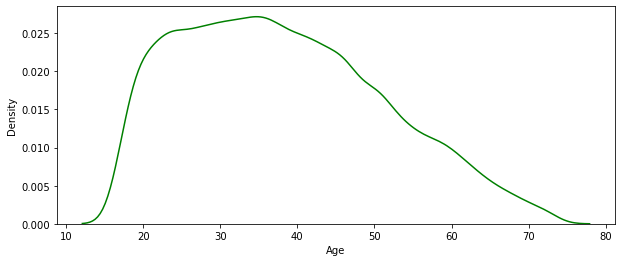

In [73]:
fig = plt.figure(figsize=(10,4))
sns.distplot(df_cleaned.Age, hist= False , color='green')
plt.show()

In [74]:
df_cleaned.describe()['Age']

count    32223.000000
mean        38.157341
std         13.051711
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         73.000000
Name: Age, dtype: float64

In [75]:
age_df = pd.DataFrame((df.describe()['Age'],df_cleaned.describe()['Age']),index=['before','after']).T
age_df

,before,after
count,32560.000000,32223.000000
mean,38.581634,38.157341
std,13.640642,13.051711
min,17.000000,17.000000
25%,28.000000,28.000000
50%,37.000000,37.000000
75%,48.000000,47.000000
max,90.000000,73.000000


In [76]:
# Workclass
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


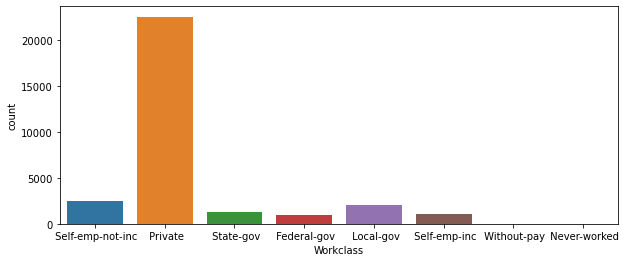

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
 State-gov            1292
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [80]:
fig= plt.figure(figsize=[10,4])
sns.countplot(df_cleaned.Workclass)
plt.show()
df_cleaned.Workclass.value_counts()

In [81]:
# In the workclass column there is a space[_] before every attribute of the workclass,let's strip that
df_cleaned.Workclass = df_cleaned.Workclass.str.lstrip()
df_cleaned.Workclass.value_counts()

Private             22570
Self-emp-not-inc     2475
Local-gov            2076
State-gov            1292
Self-emp-inc         1090
Federal-gov           955
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [90]:
# missing data in the workclass columns
df_cleaned['Workclass'].isna().sum()

0

In [84]:
1744/len(df_cleaned)*100


5.412283151785991

In [85]:
# So the missing data is about 5 percent of the workclass feature

In [89]:
df_cleaned['Workclass'].fillna('Local-gov',inplace=True)

In [ ]:
# The attributes of the workclass columns : Without pay and never worked are too less to positively impact the data.
# Thus removing those values would be a better option for our modelling

In [91]:
df_cleaned = df_cleaned[df_cleaned.Workclass!='Without-pay']
df_cleaned = df_cleaned[df_cleaned.Workclass!='Never-worked']

<AxesSubplot:>

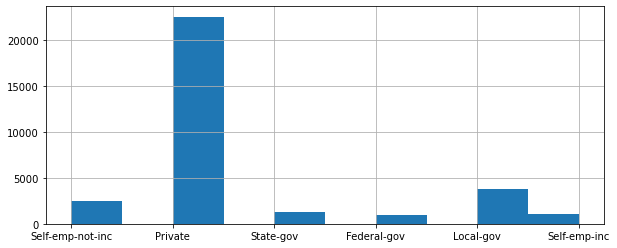

In [93]:
plt.figure(figsize=(10,4))
df_cleaned.Workclass.hist()

In [96]:
df_cleaned.Workclass.value_counts()[0]/len(df_cleaned)*100

70.08881435935656

In [ ]:
#Education and Education-num

In [97]:
df_cleaned.Education.value_counts()

 HS-grad         10389
 Some-college     7235
 Bachelors        5314
 Masters          1701
 Assoc-voc        1374
 11th             1166
 Assoc-acdm       1061
 10th              918
 7th-8th           612
 Prof-school       562
 9th               503
 12th              432
 Doctorate         403
 5th-6th           322
 1st-4th           160
 Preschool          50
Name: Education, dtype: int64

In [99]:
df_cleaned.Education = df_cleaned.Education.str.lstrip()

In [101]:
df_cleaned.Education.value_counts()

HS-grad         10389
Some-college     7235
Bachelors        5314
Masters          1701
Assoc-voc        1374
11th             1166
Assoc-acdm       1061
10th              918
7th-8th           612
Prof-school       562
9th               503
12th              432
Doctorate         403
5th-6th           322
1st-4th           160
Preschool          50
Name: Education, dtype: int64

In [102]:
df_cleaned.isna().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1744
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     578
Income               0
dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

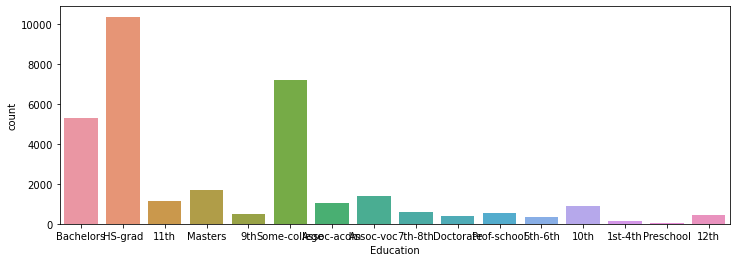

In [104]:
plt.figure(figsize=(12,4))
sns.countplot(df_cleaned.Education)

In [105]:
# Check the correlation between features education and education number
edu_df = df_cleaned.iloc[:,3:5].copy()
edu_df.sort_values(by='Education_num',inplace=True)

<AxesSubplot:xlabel='Education', ylabel='Education_num'>

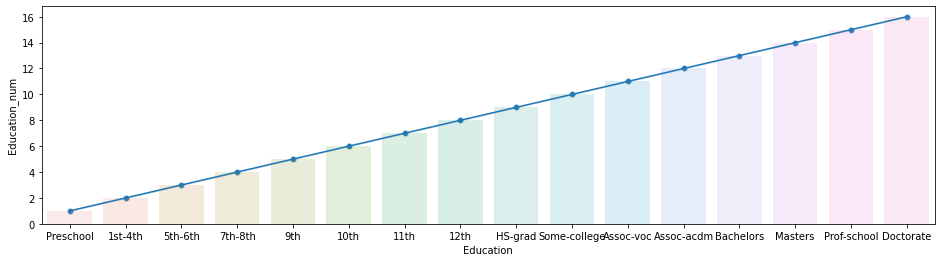

In [106]:
plt.figure(figsize=(16,4))
sns.scatterplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.lineplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.barplot(edu_df.iloc[:,0],edu_df.iloc[:,1],alpha=0.2)

In [ ]:
#We can see that the education number represents the ordinal encoding of the education feature
#So we should drop the column education from the df_cleaned(The one for model training)

<AxesSubplot:xlabel='Education', ylabel='count'>

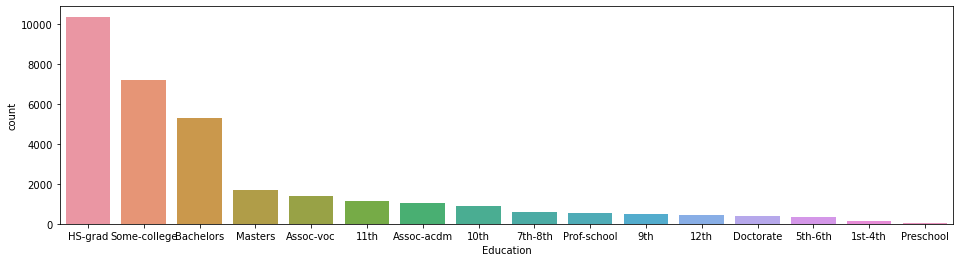

In [107]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned.Education,order=df_cleaned.Education.value_counts().index)

In [108]:
#Most of the population in the dataset are highschool graduates follows by population studying in some-college
#This is a salary predction dataset and there are some observations in the dataset which are potential not capable of having a income.

In [109]:
# let's drop the education column from the df_cleaned dataset
df_cleaned.drop('Education',1,inplace=True)

In [110]:
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Maritial-Status

In [111]:
df_cleaned['Marital_status'].value_counts()

 Married-civ-spouse       14802
 Never-married            10641
 Divorced                  4426
 Separated                 1022
 Widowed                    879
 Married-spouse-absent      410
 Married-AF-spouse           22
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

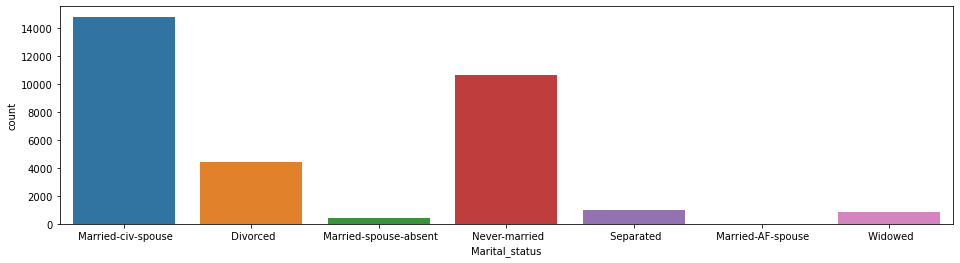

In [112]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned['Marital_status'])

In [ ]:
# MAjority of the people in the dataset are married

In [ ]:
# Occupation

 Prof-specialty       4103
 Craft-repair         4082
 Exec-managerial      4020
 Adm-clerical         3736
 Sales                3616
 Other-service        3265
 Machine-op-inspct    1995
 Transport-moving     1588
 Handlers-cleaners    1363
 Farming-fishing       971
 Tech-support          928
 Protective-serv       642
 Priv-house-serv       140
 Armed-Forces            9
Name: Occupation, dtype: int64

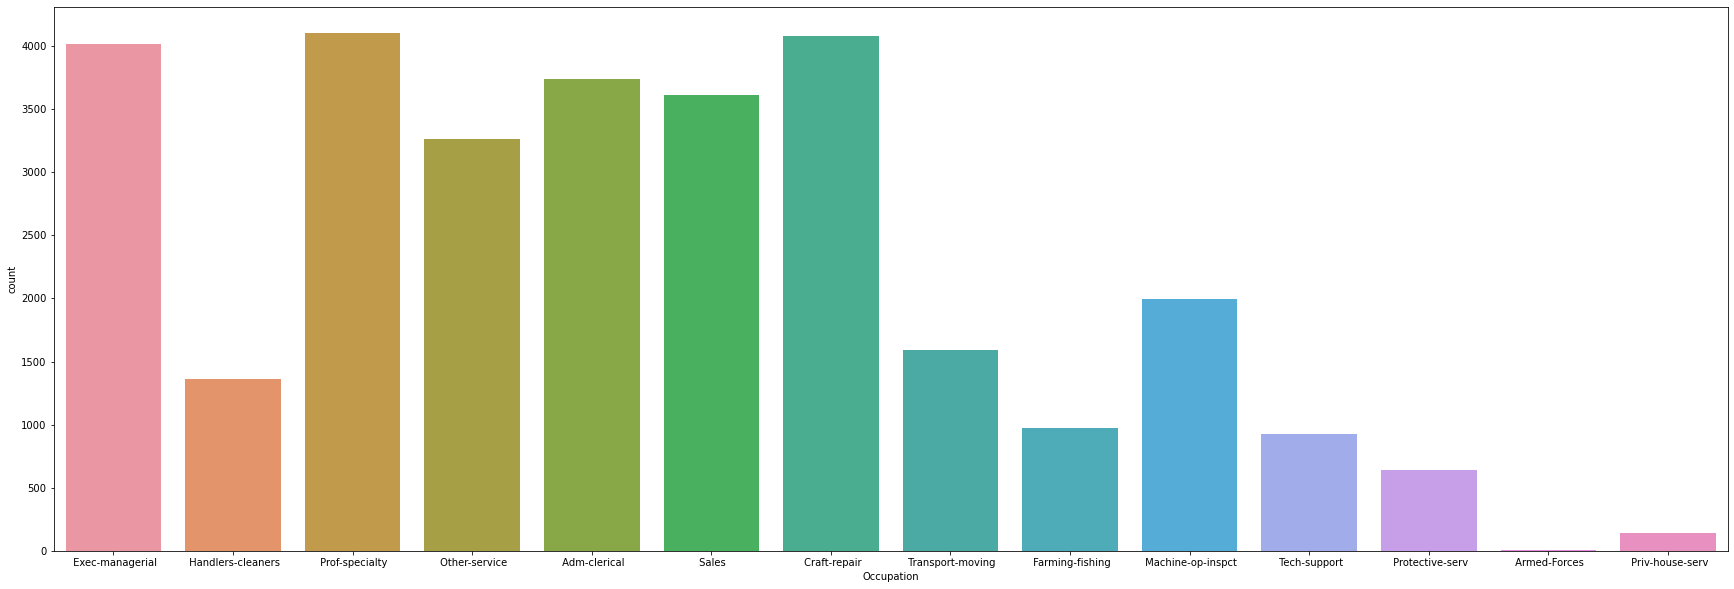

In [120]:
plt.figure(figsize=(30,10))
sns.countplot(df_cleaned['Occupation'])
df_cleaned.Occupation.value_counts()

In [121]:
df_cleaned.isna().mean()

Age               0.000000
Workclass         0.000000
Fnlwgt            0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.054158
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    0.017949
Income            0.000000
dtype: float64

There are some missing features in in occupation feature
Around 5.5 percent of data is missing form the occupation feature.
As th occupation feature follow a uniform distribution ,it is better to drop the columns with the missing occupation values

In [123]:
# drop the missing values
df_cleaned.dropna(subset=['Occupation'],inplace=True)

In [128]:
# Native Country
df_cleaned['Native_country'].value_counts()

 United-States                 27266
 Mexico                          609
 Philippines                     185
 Germany                         127
 Puerto-Rico                     108
 Canada                          107
 India                           100
 El-Salvador                      99
 Cuba                             90
 England                          85
 Jamaica                          80
 South                            70
 China                            68
 Italy                            67
 Dominican-Republic               66
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         55
 Poland                           54
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [129]:
# Majority of the ppl are form  USA

In [130]:
df['Native_country'].value_counts()[0]/len(df)*100

89.58538083538083

* Approx 89.6 percent of of the samples from the dataset are fron the States
* The data is very highly biased in comparison with other countries
* Thus we can seperate it in 2 attributes
    * People living in USA
    * People not living in the states

In [131]:
df_cleaned['Native_country']=df_cleaned['Native_country'].apply(lambda x:'Native' if x==' United-States' else 'Migrant')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

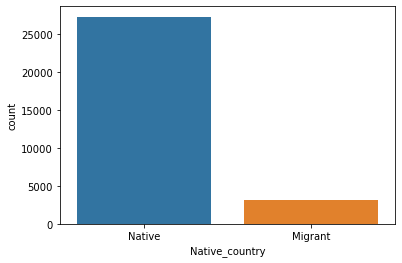

In [132]:
sns.countplot(df_cleaned["Native_country"])

In [134]:
df_cleaned.rename(columns={'Native_country':'native/migrant'},inplace=True)

In [135]:
df_cleaned['native/migrant'].value_counts()

Native     27266
Migrant     3192
Name: native/migrant, dtype: int64

In [138]:
# Race
df_cleaned.Race.value_counts()

 White                 26070
 Black                  2891
 Asian-Pac-Islander      965
 Amer-Indian-Eskimo      285
 Other                   247
Name: Race, dtype: int64

In [145]:
for race in df_cleaned.Race.unique():
  print('{0:0.2f}% of people are {1}'.format(df_cleaned.Workclass.value_counts()[0]/len(df_cleaned)*100,race))



74.10% of people are  White
74.10% of people are  Black
74.10% of people are  Asian-Pac-Islander
74.10% of people are  Amer-Indian-Eskimo
74.10% of people are  Other


<AxesSubplot:xlabel='Hours_per_week'>

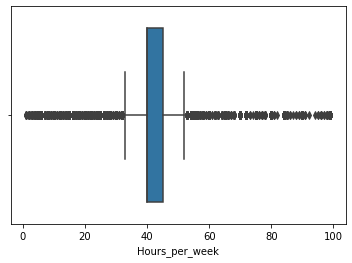

In [147]:
# Hours-per-week
sns.boxplot(df_cleaned['Hours_per_week'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

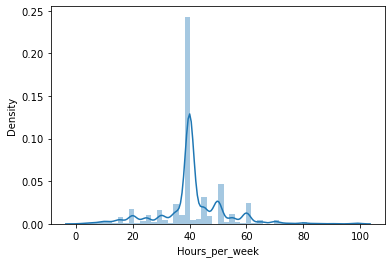

In [148]:
sns.distplot(df_cleaned['Hours_per_week'])

In [149]:
df_cleaned['Hours_per_week'].describe()

count    30458.000000
mean        41.056044
std         11.894891
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

In [ ]:
#On average an employee works roughly around 8 hours .

In [150]:
# Capital-gain / Capital-loss / fnlwgt

In [151]:
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,native/migrant,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Native,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Native,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Native,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Migrant,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,Native,<=50K


In [152]:
df_cleaned.describe()[['Capital_gain','Capital_loss']]

,Capital_gain,Capital_loss
count,30458.000000,30458.000000
mean,1099.518911,88.606573
std,7478.442869,404.186418
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,3900.000000


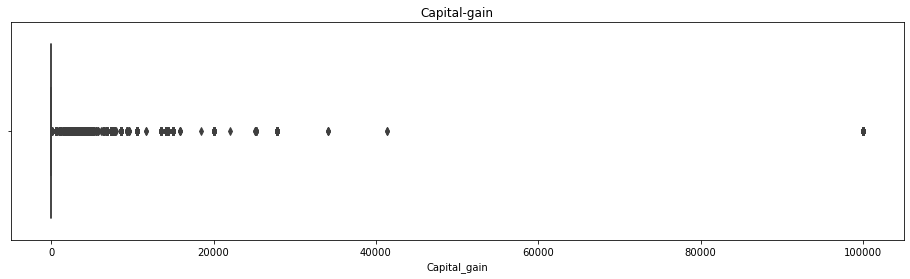

In [153]:
plt.figure(figsize=(16,4))
sns.boxplot(df_cleaned['Capital_gain'])
plt.title('Capital-gain')
plt.show()

Text(0.5, 1.0, 'Capital-loss')

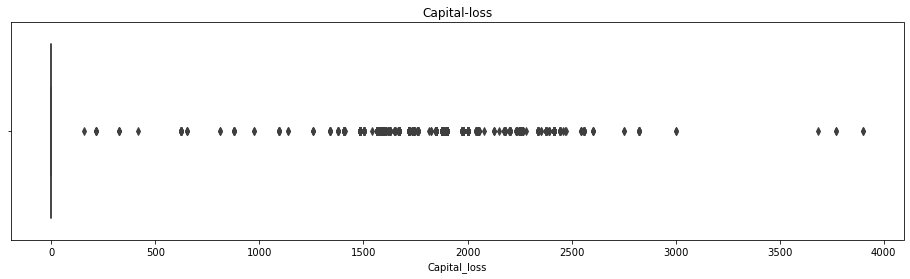

In [154]:
plt.figure(figsize=(16,4))
sns.boxplot(df_cleaned['Capital_loss'])
plt.title('Capital-loss')

In [157]:
df_cleaned['Capital_loss'].value_counts()

0       29011
1902      199
1977      167
1887      157
1848       50
        ...  
1816        1
2457        1
1844        1
2201        1
1735        1
Name: Capital_loss, Length: 88, dtype: int64

In [158]:
29011/len(df_cleaned)*100

95.24919561363188

In [160]:
df_cleaned['Capital_gain'].value_counts()

0        27905
15024      343
7688       278
7298       244
99999      153
         ...  
7978         1
2387         1
6097         1
1639         1
18481        1
Name: Capital_gain, Length: 116, dtype: int64

In [161]:
27905/len(df_cleaned)*100

91.61796572329109

In [162]:
#91% of data is 0 in the features capital-gain and capital-loss,hence its best to drop both the columns
#The fnlwgt (final weight) feature should be removed as it has no predictive power 


In [164]:
df_cleaned.drop(['Capital_loss','Capital_gain','Fnlwgt'],1,inplace=True)

In [165]:
df_cleaned.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,native/migrant,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,Native,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,Native,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,Native,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Migrant,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,Native,<=50K


In [167]:
df_cleaned['Marital_status'].value_counts()

 Married-civ-spouse       14212
 Never-married             9878
 Divorced                  4245
 Separated                  957
 Widowed                    763
 Married-spouse-absent      382
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [168]:
# Multivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

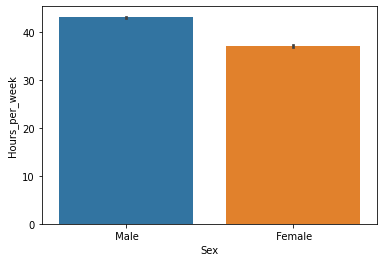

In [169]:
sns.barplot(df_cleaned.Sex,df_cleaned['Hours_per_week'])

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

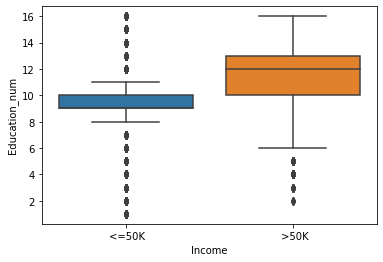

In [170]:
sns.boxplot(df_cleaned.Income,df_cleaned['Education_num'])

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

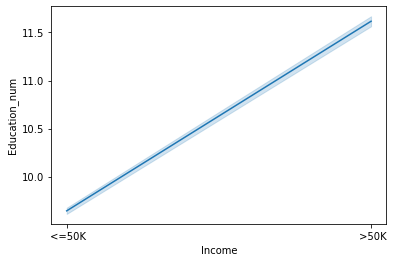

In [173]:
sns.lineplot(df_cleaned.Income,df_cleaned['Education_num'])

In [ ]:
#The salary proportional to educateducation 

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

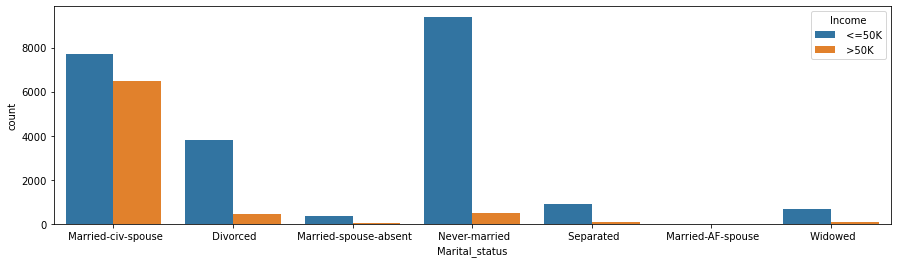

In [176]:
plt.figure(figsize=(15,4))
sns.countplot(df_cleaned['Marital_status'],hue=df_cleaned.Income)

In [177]:
df_cleaned.shape

(30458, 11)

In [184]:
df_cleaned.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,native/migrant,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,Native,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,Native,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,Native,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Migrant,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,Native,<=50K


In [185]:
df_cleaned["Income"].value_counts()

 <=50K    22856
 >50K      7602
Name: Income, dtype: int64

In [187]:
from sklearn.preprocessing import LabelEncoder

lab_enc =LabelEncoder()
df_cleaned["Workclass"]  = lab_enc.fit_transform(df_cleaned['Workclass'])
df_cleaned["Marital_status"]  = lab_enc.fit_transform(df_cleaned['Marital_status'])
df_cleaned["Occupation"]  = lab_enc.fit_transform(df_cleaned['Occupation'])
df_cleaned["Relationship"]  = lab_enc.fit_transform(df_cleaned['Relationship'])
df_cleaned["Race"]  = lab_enc.fit_transform(df_cleaned['Race'])
df_cleaned["Sex"]  = lab_enc.fit_transform(df_cleaned['Sex'])
df_cleaned["native/migrant"]  = lab_enc.fit_transform(df_cleaned['native/migrant'])
df_cleaned["Income"]  = lab_enc.fit_transform(df_cleaned['Income'])


In [188]:
# Splitting the dataset into X and y.
X = df_cleaned.drop(['Income'],axis =1)
y = df_cleaned['Income']

In [191]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)


In [192]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.33,random_state=42)

In [194]:
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (20406, 10)
YTRAIN 
 (20406,)
XTEST 
 (10052, 10)
YTRAIN 
 (10052,)


### Training and finding the best model

In [196]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [197]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [198]:
#reusable_func
def train_n_ret_score(estimator):
  model = estimator
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)


In [199]:
# Model 1 logistic regression
train_n_ret_score(LogisticRegression(max_iter=1000,C=10))

0.8038201352964585

In [201]:
# Model2 : SVC
train_n_ret_score(SVC())

0.8239156386788699

In [202]:
## Model 3 : decision tree
train_n_ret_score(DecisionTreeClassifier())

0.7735773975328293

In [203]:
# Model 4 :KNN
train_n_ret_score(KNeighborsClassifier())

0.8078989255869479

In [204]:
# MOdel5 :Random Forest
train_n_ret_score(RandomForestClassifier())

0.8152606446478313

In [205]:
# Model 6:Adaboost
train_n_ret_score(AdaBoostClassifier(base_estimator=LogisticRegression()))

0.7983485873458018

Cross Validation

In [206]:
from sklearn.model_selection import cross_val_score

In [207]:
mean_cv=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest','Adaboost']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(max_iter=1000),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),AdaBoostClassifier()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,X_train,y_train,scoring = "accuracy")
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

SVC(kernel='linear')
SVC()
LogisticRegression(max_iter=1000)
DecisionTreeClassifier()
KNeighborsClassifier(n_neighbors=9)
RandomForestClassifier()
AdaBoostClassifier()


,CV Mean,Std
Linear Svm,0.803146,0.004323
Radial Svm,0.822307,0.004116
Logistic Regression,0.800304,0.004649
Decision Tree,0.775066,0.004177
KNN,0.820200,0.002759
Random Forest,0.813045,0.004749
Adaboost,0.831570,0.005471


In [208]:
# choosing the best model

models = [LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Tree Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Tree
Adaboost


In [209]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.800941,0.803820,0.803820,0.803820,0.803820,0.800304
1,SVC,0.828972,0.823916,0.823916,0.823916,0.823916,0.822307
2,KNN,0.866363,0.807899,0.807899,0.807899,0.807899,0.813780
3,Random_forest,0.972410,0.774572,0.774572,0.774572,0.774572,0.775507
4,Decision_Tree,0.972410,0.814863,0.814863,0.814863,0.814863,0.814957
5,Adaboost,0.832990,0.834660,0.834660,0.834660,0.834660,0.831570


In [210]:
### HyperParaneter Tuning for SVC

In [211]:
from sklearn.model_selection import GridSearchCV

In [216]:
param_dict = {
    'C':[100],
    'gamma':[0.001]
}

In [217]:
GSV = GridSearchCV(SVC(),param_grid=param_dict)
GSV.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [100], 'gamma': [0.001]})

In [218]:
GSV.best_params_

{'C': 100, 'gamma': 0.001}

In [219]:
SVC_tuned = SVC(kernel='linear',C=110,gamma=0.001)

SVC_tuned.fit(X_train,y_train)

SVC(C=110, gamma=0.001, kernel='linear')

In [221]:
train_n_ret_score(SVC_tuned)

0.8066056506167927

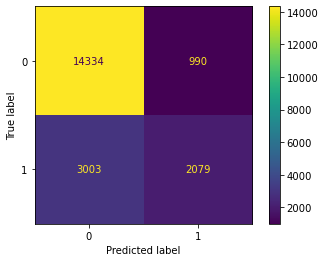

In [222]:
plot_confusion_matrix(SVC_tuned,X_train,y_train)

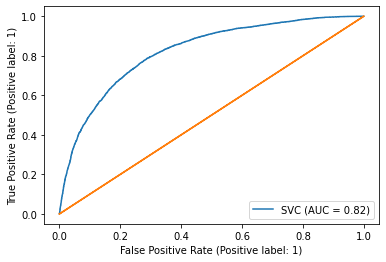

In [223]:
plot_roc_curve(SVC_tuned,X_train,y_train)
plt.plot(y_train,y_train)
plt.show()

In [224]:
## Saving the best model
import joblib 
joblib.dump(SVC_tuned,'Census_Income_class.pkl')

['Census_Income_class.pkl']